In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import gmtime, strftime, localtime
from matplotlib.ticker import MultipleLocator

params = {"xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "Tahoma"

In [3]:
mhws_df = pd.read_csv('mhws_v202504.csv') # change to mcs
mhws_df

,Site_ID,Latitude,Longitude,Ecoregion,Habitat,MHW_ID,Start_date,End_date,Duration,Average_intensity,Maximum_intensity,Cumulative_intensity,Intensity_variability,Onset_rate,Decline_rate,Category
0,1,-31.472439,-51.142094,Rio Grande,Seagrass meadow,0,1985-07-20,1985-07-28,9,2.308970,2.494355,20.780729,0.117468,0.095194,0.092518,Moderate
1,1,-31.472439,-51.142094,Rio Grande,Seagrass meadow,1,1985-08-06,1985-08-11,6,2.771907,3.541191,16.631441,0.495795,0.763656,0.316239,Moderate
2,1,-31.472439,-51.142094,Rio Grande,Seagrass meadow,2,1985-09-07,1985-09-15,9,2.950186,4.417467,26.551677,0.839566,0.651337,0.573314,Strong
3,1,-31.472439,-51.142094,Rio Grande,Seagrass meadow,3,1985-10-04,1985-10-09,6,1.924826,2.206930,11.548954,0.261446,0.236759,0.467686,Moderate
4,1,-31.472439,-51.142094,Rio Grande,Seagrass meadow,4,1985-10-13,1985-10-17,5,2.039860,2.483341,10.199302,0.304664,0.649865,0.462203,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970768,119227,0.927561,-29.326094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,126,2024-10-17,2024-10-25,9,0.840865,1.087259,7.567784,0.156414,0.087630,0.172090,Moderate
13970769,119227,0.927561,-29.326094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,127,2024-10-30,2024-11-16,18,1.153267,1.869214,20.758805,0.339451,0.338751,0.075118,Strong
13970770,119227,0.927561,-29.326094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,128,2024-11-24,2024-11-28,5,0.929884,1.041429,4.649419,0.075887,0.099718,0.292500,Moderate
13970771,119227,0.927561,-29.326094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,129,2024-12-05,2024-12-10,6,0.907754,1.054916,5.446527,0.080151,0.244273,0.080426,Moderate


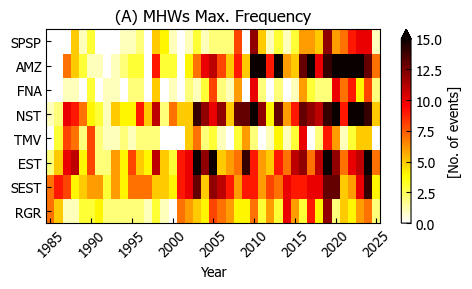

In [4]:
ordered_ecoregions = ['Rio Grande', 'Southeastern Brazil', 'Eastern Brazil', 'Trindade and Martim Vaz Islands', 'Northeastern Brazil', 'Fernando de Noronha and Atol das Rocas', 'Amazon', 'Sao Pedro and Sao Paulo Islands']

mhws_df['Start_date'] = pd.to_datetime(mhws_df['Start_date'])
mhws_df['End_date'] = pd.to_datetime(mhws_df['End_date'])

mhws_df['Midpoint_date'] = mhws_df['Start_date'] + (mhws_df['End_date'] - mhws_df['Start_date']) / 2

mhws_df['Year'] = mhws_df['Midpoint_date'].dt.year

heatwave_counts = mhws_df.groupby(['Ecoregion', 'Year', 'Site_ID'])['MHW_ID'].count()

avg_heatwave_counts = heatwave_counts.groupby(['Ecoregion', 'Year']).max().unstack(fill_value=0)

avg_heatwave_counts = avg_heatwave_counts.reindex(ordered_ecoregions)

years = avg_heatwave_counts.columns.astype(int) 
year_positions = np.arange(len(years))

plt.figure(figsize=(4.90, 3))
c = plt.pcolormesh(year_positions, np.arange(len(avg_heatwave_counts.index)), avg_heatwave_counts.values, shading='auto', cmap='hot_r',vmax=15)
plt.colorbar(c, label='[No. of events]',extend='max')

tick_spacing = 5 
plt.xticks(year_positions[::tick_spacing], years[::tick_spacing], rotation=45)

plt.yticks(np.arange(len(avg_heatwave_counts.index)), ["RGR", "SEST", "EST", "TMV", "NST", "FNA", "AMZ", "SPSP"])
plt.xlabel('Year')
#plt.ylabel('Ecoregion')
plt.title('(A) MHWs Max. Frequency')
plt.tight_layout()
#plt.savefig('new_figures/heatmaps/frequency_ecoregion.png',dpi=300)
plt.show()

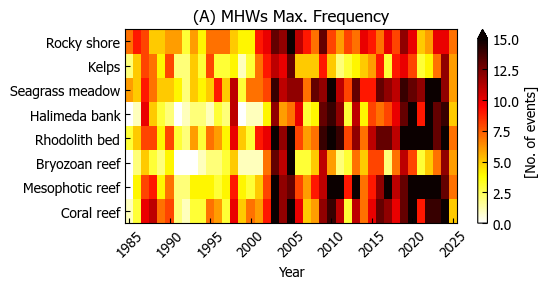

In [5]:
ordered_habitats = ['Coral reef', 'Mesophotic reef', 'Bryozoan reef', 'Rhodolith bed', 'Halimeda bank', 'Seagrass meadow', 'Kelps', 'Rocky shore'] 

mhws_df['Start_date'] = pd.to_datetime(mhws_df['Start_date'])
mhws_df['End_date'] = pd.to_datetime(mhws_df['End_date'])

# Calculate the midpoint date
mhws_df['Midpoint_date'] = mhws_df['Start_date'] + (mhws_df['End_date'] - mhws_df['Start_date']) / 2

mhws_df['Year'] = mhws_df['Midpoint_date'].dt.year

heatwave_counts = mhws_df.groupby(['Habitat', 'Year', 'Site_ID'])['MHW_ID'].count()

avg_heatwave_counts = heatwave_counts.groupby(['Habitat', 'Year']).max().unstack(fill_value=0)

avg_heatwave_counts = avg_heatwave_counts.reindex(ordered_habitats)

years = avg_heatwave_counts.columns.astype(int) 
year_positions = np.arange(len(years)) 

plt.figure(figsize=(5.60, 3))
c = plt.pcolormesh(year_positions, np.arange(len(avg_heatwave_counts.index)), avg_heatwave_counts.values, shading='auto', cmap='hot_r',vmax=15)
plt.colorbar(c, label='[No. of events]',extend='max')

tick_spacing = 5 
plt.xticks(year_positions[::tick_spacing], years[::tick_spacing], rotation=45)

plt.yticks(np.arange(len(avg_heatwave_counts.index)), avg_heatwave_counts.index)
plt.xlabel('Year')
#plt.ylabel('Ecoregion')
plt.title('(A) MHWs Max. Frequency')
plt.tight_layout()
#plt.savefig('new_figures/heatmaps/frequency_habitat.png',dpi=300)
plt.show()